In [1]:
#Impor Library SK - Fuzzy
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data_air.csv',sep=';')
df.describe()

BOD         DO        TSS
count  69.000000  69.000000  69.000000
mean    4.079275   8.533333  10.684493
std     1.205879   0.938363   4.448331
min     2.070000   7.080000   3.550000
25%     3.080000   7.780000   6.600000
50%     4.040000   8.410000  10.400000
75%     4.970000   9.120000  14.980000
max     6.690000  10.420000  18.600000

In [3]:
df

BOD     DO    TSS
0   2.84   8.67  10.80
1   2.98   8.77  16.20
2   3.19   9.37  10.35
3   2.51   8.29   7.70
4   5.38   8.48   8.50
..   ...    ...    ...
64  4.11  10.34  17.87
65  2.67  10.02  14.12
66  4.50   8.10  10.50
67  4.70   7.20   7.80
68  4.56   7.10   9.12

[69 rows x 3 columns]

# Fuzzyfikasi

In [4]:
def fungsi_segitiga(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu[idx] = 1
    
    return miu

In [5]:
def miu_fungsi_segitiga(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu[idx] = 1

    dict_fuzzy=res = {round(array_x[i],2): miu[i] for i in range(len(array_x))}
    print(dict_fuzzy)
    hasil = dict_fuzzy[x_i]

    return hasil

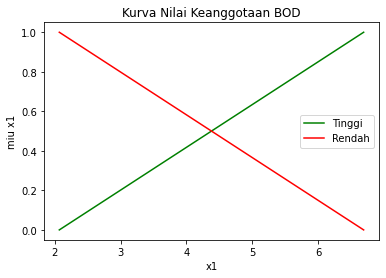

In [6]:
# Pembentukan Himpunan Fuzzy BOD [fungsi buat sendiri]
x_bod= np.arange(2.07, 6.69, 0.01) # Semesta Pembicaraan
amb_tinggi = [2.07, 6.69, 6.69]
amb_rendah = [2.07, 2.07, 6.69]

miu_bod_tinggi = fungsi_segitiga(x_bod, amb_tinggi)
miu_bod_rendah = fungsi_segitiga(x_bod, amb_rendah)

import matplotlib.pyplot as plt
plt.plot(x_bod, miu_bod_tinggi, label = "Tinggi", color='green')
plt.plot(x_bod, miu_bod_rendah, label = "Rendah", color='red')
plt.xlabel('x1')
plt.ylabel('miu x1')
plt.title('Kurva Nilai Keanggotaan BOD')
plt.legend()
plt.show()

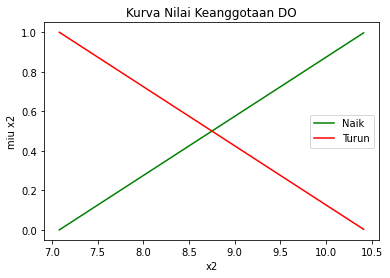

In [7]:
# Pembentukan Himpunan Fuzzy DO [fungsi buat sendiri]
x_do= np.arange(7.08, 10.42, 0.01) # Semesta Pembicaraan
amb_naik  = [7.08, 10.42, 10.42]
amb_turun = [7.08,  7.08, 10.42]

miu_do_naik  = fungsi_segitiga(x_do, amb_naik)
miu_do_turun = fungsi_segitiga(x_do, amb_turun)

import matplotlib.pyplot as plt
plt.plot(x_do, miu_do_naik,  label = "Naik",  color='green')
plt.plot(x_do, miu_do_turun, label = "Turun", color='red')
plt.xlabel('x2')
plt.ylabel('miu x2')
plt.title('Kurva Nilai Keanggotaan DO')
plt.legend()
plt.show()

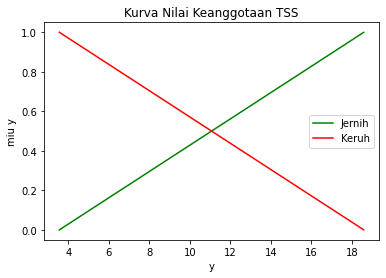

In [8]:
# Pembentukan Himpunan Fuzzy TSS [fungsi buat sendiri]
x_tss= np.arange(3.55, 18.60, 0.01) # Semesta Pembicaraan
amb_jernih  = [3.55, 18.60, 18.60]
amb_keruh  = [3.55,  3.55, 18.60]

miu_tss_jernih  = fungsi_segitiga(x_tss, amb_jernih)
miu_tss_keruh   = fungsi_segitiga(x_tss, amb_keruh)

import matplotlib.pyplot as plt
plt.plot(x_tss, miu_tss_jernih,  label = "Jernih",  color='green')
plt.plot(x_tss, miu_tss_keruh, label = "Keruh", color='red')
plt.xlabel('y')
plt.ylabel('miu y')
plt.title('Kurva Nilai Keanggotaan TSS')
plt.legend()
plt.show()

In [9]:
def fuzzyfikasi(x_array, amd_1, amd_2, x, label_1, label_2):
    batas = (max(x_array)+min(x_array))/2
    print(batas)
    hasil=0
    if x < batas:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    return hasil, label_hasil

In [10]:
x_bod= np.arange(2.07, 6.69, 0.01)
amb_tinggi = [2.07, 6.69, 6.69]
amb_rendah = [2.07, 2.07, 6.69]

fuzzifikasi_BOD=[]
miu_BOD=[]
for i in df.BOD:
    hasil=fuzzyfikasi(x_bod, amb_tinggi, amb_rendah, i, "Rendah", "Tinggi")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_BOD.append(fuzz)
    miu_BOD.append(m)
    
len(fuzzifikasi_BOD)

4.379999999999951
{2.07: 0.0, 2.08: 0.002164502164502118, 2.09: 0.004329004329004236, 2.1: 0.006493506493506353, 2.11: 0.008658008658008472, 2.12: 0.01082251082251059, 2.13: 0.012987012987012707, 2.14: 0.015151515151514826, 2.15: 0.017316017316016945, 2.16: 0.01948051948051906, 2.17: 0.02164502164502118, 2.18: 0.023809523809523298, 2.19: 0.025974025974025414, 2.2: 0.028138528138527533, 2.21: 0.03030303030302965, 2.22: 0.03246753246753177, 2.23: 0.03463203463203389, 2.24: 0.036796536796536, 2.25: 0.03896103896103812, 2.26: 0.04112554112554024, 2.27: 0.04329004329004236, 2.28: 0.04545454545454448, 2.29: 0.047619047619046596, 2.3: 0.04978354978354871, 2.31: 0.05194805194805083, 2.32: 0.054112554112552946, 2.33: 0.056277056277055065, 2.34: 0.058441558441557184, 2.35: 0.0606060606060593, 2.36: 0.06277056277056142, 2.37: 0.06493506493506354, 2.38: 0.06709956709956566, 2.39: 0.06926406926406778, 2.4: 0.07142857142856988, 2.41: 0.073593073593072, 2.42: 0.07575757575757412, 2.43: 0.077922077922

69

In [11]:
x_do= np.arange(7.08, 10.43, 0.01) 
amb_naik  = [7.08, 10.42, 10.42]
amb_turun = [7.08,  7.08, 10.42]
    
fuzzifikasi_DO=[]
miu_DO=[]
for i in df.DO:
    hasil=fuzzyfikasi(x_do, amb_naik, amb_turun, i, "Turun", "Naik")
    fuzz = hasil[1]
    m =hasil[0]
    fuzzifikasi_DO.append(fuzz)
    miu_DO.append(m)
len(fuzzifikasi_DO)

8.749999999999964
{7.08: 0.0, 7.09: 0.0029940119760478406, 7.1: 0.005988023952095681, 7.11: 0.008982035928143521, 7.12: 0.011976047904191362, 7.13: 0.014970059880239202, 7.14: 0.017964071856287043, 7.15: 0.020958083832334884, 7.16: 0.023952095808382725, 7.17: 0.026946107784430566, 7.18: 0.029940119760478404, 7.19: 0.03293413173652625, 7.2: 0.035928143712574086, 7.21: 0.03892215568862192, 7.22: 0.04191616766466977, 7.23: 0.044910179640717605, 7.24: 0.04790419161676545, 7.25: 0.05089820359281329, 7.26: 0.05389221556886113, 7.27: 0.05688622754490897, 7.28: 0.05988023952095681, 7.29: 0.06287425149700465, 7.3: 0.0658682634730525, 7.31: 0.06886227544910033, 7.32: 0.07185628742514817, 7.33: 0.07485029940119602, 7.34: 0.07784431137724385, 7.35: 0.08083832335329169, 7.36: 0.08383233532933954, 7.37: 0.08682634730538738, 7.38: 0.08982035928143521, 7.39: 0.09281437125748306, 7.4: 0.0958083832335309, 7.41: 0.09880239520957873, 7.42: 0.10179640718562658, 7.43: 0.10479041916167442, 7.44: 0.1077844311

69

In [12]:
x_tss= np.arange(3.55, 18.61, 0.01)
amb_jernih  = [3.55, 18.60, 18.60]
amb_keruh   = [3.55,  3.55, 18.60]
    
fuzzifikasi_TSS=[]
miu_TSS=[]
for i in df.TSS:
    hasil=fuzzyfikasi(x_tss, amb_jernih, amb_keruh, i, "Keruh", "Jernih")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_TSS.append(fuzz)
    miu_TSS.append(m)
len(fuzzifikasi_TSS)

11.07499999999984
{3.55: 0.0, 3.56: 0.0006644518272425108, 3.57: 0.0013289036544850215, 3.58: 0.001993355481727532, 3.59: 0.002657807308970043, 3.6: 0.0033222591362125535, 3.61: 0.003986710963455064, 3.62: 0.0046511627906975755, 3.63: 0.005315614617940086, 3.64: 0.0059800664451825965, 3.65: 0.006644518272425107, 3.66: 0.007308970099667618, 3.67: 0.007973421926910128, 3.68: 0.008637873754152639, 3.69: 0.009302325581395151, 3.7: 0.009966777408637661, 3.71: 0.010631229235880172, 3.72: 0.011295681063122683, 3.73: 0.011960132890365193, 3.74: 0.012624584717607704, 3.75: 0.013289036544850214, 3.76: 0.013953488372092725, 3.77: 0.014617940199335235, 3.78: 0.015282392026577746, 3.79: 0.015946843853820256, 3.8: 0.016611295681062767, 3.81: 0.017275747508305277, 3.82: 0.017940199335547788, 3.83: 0.018604651162790302, 3.84: 0.019269102990032812, 3.85: 0.019933554817275323, 3.86: 0.020598006644517834, 3.87: 0.021262458471760344, 3.88: 0.021926910299002855, 3.89: 0.022591362126245365, 3.9: 0.023255813

69

In [13]:
df_fuzz = pd.DataFrame({"BOD":df.BOD,
                        "DO":df.DO,
                        "TSS":df.TSS,
                        "BOD_fuzz": fuzzifikasi_BOD,
                       "DO_fuzz": fuzzifikasi_DO,
                       "TSS_fuzz": fuzzifikasi_TSS,
                       "miu_BOD":miu_BOD,
                       "miu_DO":miu_DO,
                       "miu_TSS":miu_TSS,})
df_fuzz

BOD     DO    TSS BOD_fuzz DO_fuzz TSS_fuzz   miu_BOD    miu_DO   miu_TSS
0   2.84   8.67  10.80   Rendah   Turun    Keruh  0.166667  0.476048  0.481728
1   2.98   8.77  16.20   Rendah    Naik   Jernih  0.196970  0.494012  0.159468
2   3.19   9.37  10.35   Rendah    Naik    Keruh  0.242424  0.314371  0.451827
3   2.51   8.29   7.70   Rendah   Turun    Keruh  0.095238  0.362275  0.275748
4   5.38   8.48   8.50   Tinggi   Turun    Keruh  0.283550  0.419162  0.328904
..   ...    ...    ...      ...     ...      ...       ...       ...       ...
64  4.11  10.34  17.87   Rendah    Naik   Jernih  0.441558  0.023952  0.048505
65  2.67  10.02  14.12   Rendah    Naik   Jernih  0.129870  0.119760  0.297674
66  4.50   8.10  10.50   Tinggi   Turun    Keruh  0.474026  0.305389  0.461794
67  4.70   7.20   7.80   Tinggi   Turun    Keruh  0.430736  0.035928  0.282392
68  4.56   7.10   9.12   Tinggi   Turun    Keruh  0.461039  0.005988  0.370100

[69 rows x 9 columns]

# Rule Generation

In [14]:
df_fuzz['Rule'] = "Jika X1 " + df_fuzz['BOD_fuzz'] + " dan X2 " + df_fuzz['DO_fuzz'] + " maka Y " + df_fuzz['TSS_fuzz']
df_fuzz.head()

BOD    DO  ...   miu_TSS                                      Rule
0  2.84  8.67  ...  0.481728  Jika X1 Rendah dan X2 Turun maka Y Keruh
1  2.98  8.77  ...  0.159468  Jika X1 Rendah dan X2 Naik maka Y Jernih
2  3.19  9.37  ...  0.451827   Jika X1 Rendah dan X2 Naik maka Y Keruh
3  2.51  8.29  ...  0.275748  Jika X1 Rendah dan X2 Turun maka Y Keruh
4  5.38  8.48  ...  0.328904  Jika X1 Tinggi dan X2 Turun maka Y Keruh

[5 rows x 10 columns]

In [15]:
df_fuzz['Rule'].value_counts()

Jika X1 Rendah dan X2 Naik maka Y Jernih     10
Jika X1 Rendah dan X2 Turun maka Y Keruh     10
Jika X1 Rendah dan X2 Naik maka Y Keruh      10
Jika X1 Rendah dan X2 Turun maka Y Jernih    10
Jika X1 Tinggi dan X2 Turun maka Y Jernih    10
Jika X1 Tinggi dan X2 Naik maka Y Keruh      10
Jika X1 Tinggi dan X2 Turun maka Y Keruh      9
Name: Rule, dtype: int64

# TSK Prediction

In [16]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Rule 1**

In [17]:
# Rule 1
rule_1 = df_fuzz[df_fuzz['Rule']=="Jika X1 Rendah dan X2 Turun maka Y Keruh"]
index=rule_1.index

data_rule_1=df_fuzz.iloc[index,:3]

X=np.array(data_rule_1.iloc[::,:-1])
#Y=np.array(data_rule_1.iloc[::,:1])
Y=np.array(data_rule_1.iloc[:,2])


In [18]:
data_rule_1

BOD    DO    TSS
0   2.84  8.67  10.80
3   2.51  8.29   7.70
5   3.50  8.10   6.20
6   2.07  7.49   6.15
11  2.94  7.78   6.25
14  4.10  7.20  10.85
19  3.72  7.90   5.60
21  3.12  8.07   4.25
22  2.24  7.98   6.95
25  3.62  8.38   4.91

In [19]:
X=np.array(data_rule_1.iloc[::,:-1])
X

array([[2.84, 8.67],
       [2.51, 8.29],
       [3.5 , 8.1 ],
       [2.07, 7.49],
       [2.94, 7.78],
       [4.1 , 7.2 ],
       [3.72, 7.9 ],
       [3.12, 8.07],
       [2.24, 7.98],
       [3.62, 8.38]])

In [20]:
Y=np.array(data_rule_1.iloc[:,2])
Y

array([10.8 ,  7.7 ,  6.2 ,  6.15,  6.25, 10.85,  5.6 ,  4.25,  6.95,
        4.91])

In [21]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y) 
# Proses Training Model
poly_reg.fit(X, Y) 

# Memprediksi hasil dengan regresi polynomial
y1=lin_reg_2.predict(poly_reg.fit_transform(X))

data_rule_1['pred'] = y1
y1

array([10.30675777,  7.99935534,  5.16662493,  6.17958488,  5.76187428,
       11.04197564,  5.12639779,  5.70184788,  6.79158159,  5.5839999 ])

**Rule 2**


In [22]:
# Rule 2
rule_2 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tinggi dan X2 Turun maka Y Keruh"]
index=rule_2.index

data_rule_2=df_fuzz.iloc[index,:3]
data_rule_2

BOD    DO    TSS
4   5.38  8.48   8.50
7   4.75  7.76  10.35
10  5.92  8.68   4.00
12  4.50  8.33   9.20
13  5.05  7.08   8.90
24  4.63  7.47  10.10
66  4.50  8.10  10.50
67  4.70  7.20   7.80
68  4.56  7.10   9.12

In [23]:
X=np.array(data_rule_2.iloc[::,:-1])
X

array([[5.38, 8.48],
       [4.75, 7.76],
       [5.92, 8.68],
       [4.5 , 8.33],
       [5.05, 7.08],
       [4.63, 7.47],
       [4.5 , 8.1 ],
       [4.7 , 7.2 ],
       [4.56, 7.1 ]])

In [24]:
Y=np.array(data_rule_2.iloc[:,2])
Y

array([ 8.5 , 10.35,  4.  ,  9.2 ,  8.9 , 10.1 , 10.5 ,  7.8 ,  9.12])

In [25]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y) 
# Proses Training Model
poly_reg.fit(X, Y) 

# Memprediksi hasil dengan regresi polynomial
y2=lin_reg_2.predict(poly_reg.fit_transform(X))

data_rule_2['pred'] = y2
y2

array([ 8.27148   , 10.45678497,  4.10765399,  9.60659735,  8.59386429,
        9.86928769, 10.02345014,  9.10462163,  8.43625992])

**Rule 3**

In [26]:
# Rule 3
rule_3 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tinggi dan X2 Turun maka Y Jernih"]
index=rule_3.index

data_rule_3=df_fuzz.iloc[index,:3]
data_rule_3

BOD    DO    TSS
8   4.67  8.17  15.20
9   4.50  7.78  11.65
16  4.97  7.16  16.45
46  5.55  8.45  14.98
47  4.67  7.93  16.21
48  6.34  7.10  13.75
49  5.71  8.31  18.10
50  6.30  7.27  17.90
51  4.98  7.39  15.87
52  5.76  7.78  12.32

In [27]:
X=np.array(data_rule_3.iloc[::,:-1])
X

array([[4.67, 8.17],
       [4.5 , 7.78],
       [4.97, 7.16],
       [5.55, 8.45],
       [4.67, 7.93],
       [6.34, 7.1 ],
       [5.71, 8.31],
       [6.3 , 7.27],
       [4.98, 7.39],
       [5.76, 7.78]])

In [28]:
Y=np.array(data_rule_3.iloc[:,2])
Y

array([15.2 , 11.65, 16.45, 14.98, 16.21, 13.75, 18.1 , 17.9 , 15.87,
       12.32])

In [29]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y) 
# Proses Training Model
poly_reg.fit(X, Y) 

# Memprediksi hasil dengan regresi polynomial
y3=lin_reg_2.predict(poly_reg.fit_transform(X))

data_rule_3['pred'] = y3
y3

array([14.67446531, 13.9387128 , 16.14401471, 16.63433733, 14.24125127,
       15.74741018, 15.97811464, 15.10263799, 15.20759619, 14.76145958])

**Rule 4**

In [30]:
# Rule 4
rule_4 = df_fuzz[df_fuzz['Rule']=="Jika X1 Rendah dan X2 Naik maka Y Jernih"]
index=rule_4.index

data_rule_4=df_fuzz.iloc[index,:3]
data_rule_4

BOD     DO    TSS
1   2.98   8.77  16.20
17  3.51   9.51  12.15
23  2.13   9.20  18.60
59  2.09   8.97  12.07
60  3.54   9.67  11.57
61  3.08   8.96  11.21
62  4.23  10.21  15.04
63  2.98   9.43  15.78
64  4.11  10.34  17.87
65  2.67  10.02  14.12

In [31]:
X=np.array(data_rule_4.iloc[::,:-1])
X

array([[ 2.98,  8.77],
       [ 3.51,  9.51],
       [ 2.13,  9.2 ],
       [ 2.09,  8.97],
       [ 3.54,  9.67],
       [ 3.08,  8.96],
       [ 4.23, 10.21],
       [ 2.98,  9.43],
       [ 4.11, 10.34],
       [ 2.67, 10.02]])

In [32]:
Y=np.array(data_rule_4.iloc[:,2])
Y

array([16.2 , 12.15, 18.6 , 12.07, 11.57, 11.21, 15.04, 15.78, 17.87,
       14.12])

In [33]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y) 
# Proses Training Model
poly_reg.fit(X, Y) 

# Memprediksi hasil dengan regresi polynomial
y4=lin_reg_2.predict(poly_reg.fit_transform(X))

data_rule_4['pred'] = y4
y4

array([14.05161076, 12.36675879, 14.74109937, 15.82939887, 13.06657097,
       13.2692522 , 15.10859663, 13.84731094, 17.12443125, 15.20497021])

**Rule 5**

In [34]:
# Rule 5
rule_5 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tinggi dan X2 Naik maka Y Keruh"]
index=rule_5.index

data_rule_5=df_fuzz.iloc[index,:3]
data_rule_5

BOD     DO    TSS
15  6.69   9.37   6.60
18  4.98  10.42   3.55
35  5.25   8.98   5.65
36  5.75  10.18   6.15
53  5.67   8.76   3.79
54  4.57   9.02   4.87
55  5.87  10.41   4.08
56  6.12   9.04   6.12
57  6.03   8.98   5.23
58  4.46   9.54  11.01

In [35]:
X=np.array(data_rule_5.iloc[::,:-1])
X

array([[ 6.69,  9.37],
       [ 4.98, 10.42],
       [ 5.25,  8.98],
       [ 5.75, 10.18],
       [ 5.67,  8.76],
       [ 4.57,  9.02],
       [ 5.87, 10.41],
       [ 6.12,  9.04],
       [ 6.03,  8.98],
       [ 4.46,  9.54]])

In [36]:
Y=np.array(data_rule_5.iloc[:,2])
Y

array([ 6.6 ,  3.55,  5.65,  6.15,  3.79,  4.87,  4.08,  6.12,  5.23,
       11.01])

In [37]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y) 
# Proses Training Model
poly_reg.fit(X, Y) 

# Memprediksi hasil dengan regresi polynomial
y5=lin_reg_2.predict(poly_reg.fit_transform(X))

data_rule_5['pred'] = y5
y5

array([6.87502771, 4.32073044, 6.13123577, 6.61806638, 2.75539851,
       5.8969193 , 3.1793668 , 6.07116514, 5.54324321, 9.65884674])

**Rule 6**

In [38]:
rule_6 = df_fuzz[df_fuzz['Rule']=="Jika X1 Rendah dan X2 Turun maka Y Jernih"]
index=rule_6.index

data_rule_6=df_fuzz.iloc[index,:3]
data_rule_6

BOD    DO    TSS
20  3.02  8.41  15.55
37  3.57  8.05  13.78
38  2.97  7.56  15.00
39  4.00  7.90  17.40
40  3.21  7.65  14.88
41  2.54  8.00  16.74
42  4.10  7.30  11.98
43  2.80  8.40  15.30
44  4.20  7.50  13.50
45  3.78  7.65  18.50

In [39]:
X=np.array(data_rule_6.iloc[::,:-1])
X

array([[3.02, 8.41],
       [3.57, 8.05],
       [2.97, 7.56],
       [4.  , 7.9 ],
       [3.21, 7.65],
       [2.54, 8.  ],
       [4.1 , 7.3 ],
       [2.8 , 8.4 ],
       [4.2 , 7.5 ],
       [3.78, 7.65]])

In [40]:
Y=np.array(data_rule_6.iloc[:,2])
Y

array([15.55, 13.78, 15.  , 17.4 , 14.88, 16.74, 11.98, 15.3 , 13.5 ,
       18.5 ])

In [41]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y) 
# Proses Training Model
poly_reg.fit(X, Y) 

# Memprediksi hasil dengan regresi polynomial
y6=lin_reg_2.predict(poly_reg.fit_transform(X))

data_rule_6['pred'] = y6
y6

array([14.87851652, 16.5037164 , 14.69943712, 16.25798773, 15.67143876,
       16.83095061, 12.3542302 , 15.20466086, 14.50036332, 15.72869847])

**Rule 7**

In [42]:
rule_7 = df_fuzz[df_fuzz['Rule']=="Jika X1 Rendah dan X2 Naik maka Y Keruh"]
index=rule_7.index

data_rule_7=df_fuzz.iloc[index,:3]
data_rule_7

BOD     DO    TSS
2   3.19   9.37  10.35
26  2.87   9.20   4.50
27  4.04  10.00   3.98
28  3.12   8.89  10.40
29  2.34   9.12   9.56
30  3.12   9.03   8.94
31  4.02   8.95   7.75
32  2.91   8.94  10.10
33  3.15   9.50   8.29
34  3.71  10.20   8.51

In [56]:
X=np.array(data_rule_7.iloc[::,:-1])
X

array([[ 3.19,  9.37, 10.35],
       [ 2.87,  9.2 ,  4.5 ],
       [ 4.04, 10.  ,  3.98],
       [ 3.12,  8.89, 10.4 ],
       [ 2.34,  9.12,  9.56],
       [ 3.12,  9.03,  8.94],
       [ 4.02,  8.95,  7.75],
       [ 2.91,  8.94, 10.1 ],
       [ 3.15,  9.5 ,  8.29],
       [ 3.71, 10.2 ,  8.51]])

In [44]:
Y=np.array(data_rule_7.iloc[:,2])
Y

array([10.35,  4.5 ,  3.98, 10.4 ,  9.56,  8.94,  7.75, 10.1 ,  8.29,
        8.51])

In [45]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y) 
# Proses Training Model
poly_reg.fit(X, Y) 

# Memprediksi hasil dengan regresi polynomial
y7=lin_reg_2.predict(poly_reg.fit_transform(X))

data_rule_7['pred'] = y7
y7

array([7.86136588, 8.63677875, 4.16767575, 9.93287174, 8.63717982,
       9.01155804, 7.95335301, 9.5601902 , 8.06440344, 8.55462337])

In [46]:
df_pred=pd.concat([data_rule_1,data_rule_2,data_rule_3,data_rule_4,data_rule_5,data_rule_6,data_rule_7], ignore_index=False)
df_pred.sort_index()

BOD     DO    TSS       pred
0   2.84   8.67  10.80  10.306758
1   2.98   8.77  16.20  14.051611
2   3.19   9.37  10.35   7.861366
3   2.51   8.29   7.70   7.999355
4   5.38   8.48   8.50   8.271480
..   ...    ...    ...        ...
64  4.11  10.34  17.87  17.124431
65  2.67  10.02  14.12  15.204970
66  4.50   8.10  10.50  10.023450
67  4.70   7.20   7.80   9.104622
68  4.56   7.10   9.12   8.436260

[69 rows x 4 columns]

In [47]:
import pandas as pd
data1=pd.DataFrame(df_pred)
data1.to_excel('hasil_prediksi.xlsx')

In [48]:
df_fuzz

BOD     DO  ...   miu_TSS                                      Rule
0   2.84   8.67  ...  0.481728  Jika X1 Rendah dan X2 Turun maka Y Keruh
1   2.98   8.77  ...  0.159468  Jika X1 Rendah dan X2 Naik maka Y Jernih
2   3.19   9.37  ...  0.451827   Jika X1 Rendah dan X2 Naik maka Y Keruh
3   2.51   8.29  ...  0.275748  Jika X1 Rendah dan X2 Turun maka Y Keruh
4   5.38   8.48  ...  0.328904  Jika X1 Tinggi dan X2 Turun maka Y Keruh
..   ...    ...  ...       ...                                       ...
64  4.11  10.34  ...  0.048505  Jika X1 Rendah dan X2 Naik maka Y Jernih
65  2.67  10.02  ...  0.297674  Jika X1 Rendah dan X2 Naik maka Y Jernih
66  4.50   8.10  ...  0.461794  Jika X1 Tinggi dan X2 Turun maka Y Keruh
67  4.70   7.20  ...  0.282392  Jika X1 Tinggi dan X2 Turun maka Y Keruh
68  4.56   7.10  ...  0.370100  Jika X1 Tinggi dan X2 Turun maka Y Keruh

[69 rows x 10 columns]

In [49]:
df_fuzz['alpha_predikat']=df_fuzz[['miu_BOD','miu_DO']].min(axis=1)
df_fuzz

BOD     DO  ...                                      Rule alpha_predikat
0   2.84   8.67  ...  Jika X1 Rendah dan X2 Turun maka Y Keruh       0.166667
1   2.98   8.77  ...  Jika X1 Rendah dan X2 Naik maka Y Jernih       0.196970
2   3.19   9.37  ...   Jika X1 Rendah dan X2 Naik maka Y Keruh       0.242424
3   2.51   8.29  ...  Jika X1 Rendah dan X2 Turun maka Y Keruh       0.095238
4   5.38   8.48  ...  Jika X1 Tinggi dan X2 Turun maka Y Keruh       0.283550
..   ...    ...  ...                                       ...            ...
64  4.11  10.34  ...  Jika X1 Rendah dan X2 Naik maka Y Jernih       0.023952
65  2.67  10.02  ...  Jika X1 Rendah dan X2 Naik maka Y Jernih       0.119760
66  4.50   8.10  ...  Jika X1 Tinggi dan X2 Turun maka Y Keruh       0.305389
67  4.70   7.20  ...  Jika X1 Tinggi dan X2 Turun maka Y Keruh       0.035928
68  4.56   7.10  ...  Jika X1 Tinggi dan X2 Turun maka Y Keruh       0.005988

[69 rows x 11 columns]

In [50]:
df_fuzz['y_pred_regressi']=df_pred.pred
df_fuzz

BOD     DO  ...  alpha_predikat y_pred_regressi
0   2.84   8.67  ...        0.166667       10.306758
1   2.98   8.77  ...        0.196970       14.051611
2   3.19   9.37  ...        0.242424        7.861366
3   2.51   8.29  ...        0.095238        7.999355
4   5.38   8.48  ...        0.283550        8.271480
..   ...    ...  ...             ...             ...
64  4.11  10.34  ...        0.023952       17.124431
65  2.67  10.02  ...        0.119760       15.204970
66  4.50   8.10  ...        0.305389       10.023450
67  4.70   7.20  ...        0.035928        9.104622
68  4.56   7.10  ...        0.005988        8.436260

[69 rows x 12 columns]

In [53]:
#df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']/df_fuzz['alpha_predikat'].sum()
df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']
df_fuzz

BOD     DO    TSS  ... alpha_predikat y_pred_regressi  Pred TSK
0   2.84   8.67  10.80  ...       0.166667       10.306758  0.152227
1   2.98   8.77  16.20  ...       0.196970       14.051611  0.245271
2   3.19   9.37  10.35  ...       0.242424        7.861366  0.168886
3   2.51   8.29   7.70  ...       0.095238        7.999355  0.067513
4   5.38   8.48   8.50  ...       0.283550        8.271480  0.207842
..   ...    ...    ...  ...            ...             ...       ...
64  4.11  10.34  17.87  ...       0.023952       17.124431  0.036348
65  2.67  10.02  14.12  ...       0.119760       15.204970  0.161369
66  4.50   8.10  10.50  ...       0.305389       10.023450  0.271264
67  4.70   7.20   7.80  ...       0.035928        9.104622  0.028988
68  4.56   7.10   9.12  ...       0.005988        8.436260  0.004477

[69 rows x 13 columns]

In [54]:
x1= df_fuzz.index
y1= df_fuzz.TSS
y2= df_fuzz['Pred TSK']

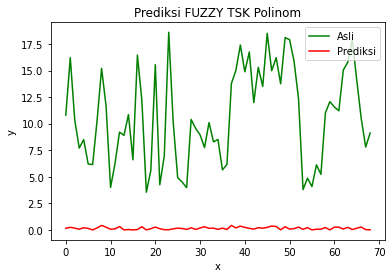

In [55]:
plt.plot(x1, y1,  label = "Asli",  color='green')
plt.plot(x1, y2, label = "Prediksi", color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediksi FUZZY TSK Polinom')
plt.legend()
plt.show()